In [26]:
import pathlib
import datetime
import json

from matplotlib import pyplot as plt

In [3]:
ROOT_DIR = pathlib.Path('/home/michel/projects/desinfo/political-ads-scraper')

In [29]:
data = {}

start_date = datetime.date(2019, 5, 10)
current_date = start_date
today = datetime.date.today()
dates = []
while current_date <= today:
    file_path = ROOT_DIR / 'data/reports/FR' / str(current_date) / 'data.json'
    if file_path.is_file():
        dates.append(current_date)
        with open(file_path, 'r') as f:
            data[current_date] = json.load(f)
    current_date += datetime.timedelta(1)


In [21]:
list(data[datetime.date(2019, 6, 13)].keys())

['lifetime_data', 'location_data', 'advertiser_data', 'download']

In [33]:
def print_date(date):
    plt.plot(
        *zip(*[
            (day, value['payload']['totalSpend'])
            for day, value in data[date]['lifetime_data'].items()
        ])
    )

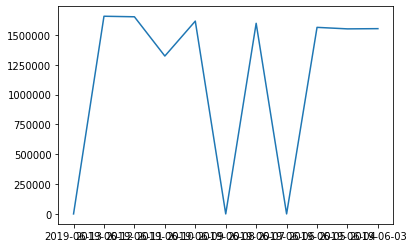

In [34]:
print_date(dates[-1])

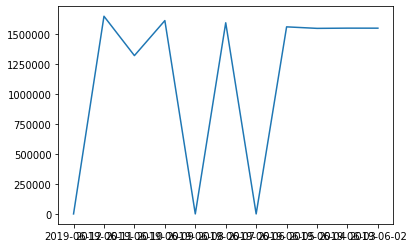

In [35]:
print_date(dates[-2])

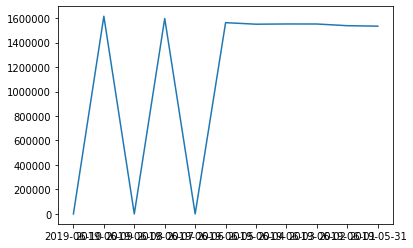

In [36]:
print_date(dates[-3])

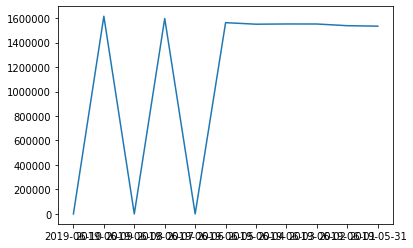

In [37]:
print_date(dates[-3])

In [24]:
data[datetime.date(2019, 6, 13)]['lifetime_data']

{'2019-06-13': {'__ar': 1,
  'payload': {'totalAds': 0,
   'totalSpend': 0,
   'keywords': ['free shipping'],
   'facebookSpend': {},
   'areReportsDownloadable': {'yesterday': True,
    'last_7_days': True,
    'last_30_days': True,
    'last_90_days': False,
    'lifelong': True}},
  'bootloadable': {},
  'ixData': {},
  'bxData': {},
  'gkxData': {},
  'qexData': {},
  'lid': '6701945146215945440'},
 '2019-06-12': {'__ar': 1,
  'payload': {'totalAds': 7531,
   'totalSpend': 1656223,
   'keywords': ['free shipping'],
   'facebookSpend': {'last_90_days': 354816,
    'last_30_days': 210582,
    'lifelong': 354816},
   'areReportsDownloadable': {'yesterday': True,
    'last_7_days': True,
    'last_30_days': True,
    'last_90_days': False,
    'lifelong': True}},
  'bootloadable': {},
  'ixData': {},
  'bxData': {},
  'gkxData': {},
  'qexData': {},
  'lid': '6701945150566657193'},
 '2019-06-11': {'__ar': 1,
  'payload': {'totalAds': 7436,
   'totalSpend': 1651706,
   'keywords': ['fre

In [ ]:
amount_by_location = {
        location['locationName']: location['totalSpend']
        for location in data['payload']['locations']
    }
    return amount_by_location

In [ ]:
amounts_by_day = {
    str(day): fetch_data_for_date(date='2019-05-{}'.format(day), time_preset='yesterday')
    for day in range(13, 30)
}

In [ ]:
amounts = pd.DataFrame.from_dict(amounts_by_day)

In [ ]:
plt.plot(amounts.sum())

In [ ]:
by_location_week = fetch_data_for_date(date='2019-05-29', time_preset='last_7_days')

In [ ]:
by_location_week

In [ ]:
sum(by_location_week.values())

In [ ]:
amounts[['23', '24', '25', '26', '27', '28', '29']].sum(axis=1).sum()

In [ ]:
fetch_data_for_date(date='2019-05-29', time_preset='last_30_days')

A few limitations:
* the reports API is not documented
* the total spend is not always consistent. For example, the value for June 10th is changed. Sometime the value is equal to zero (June 6th, June 8th).
* the stats for 7 consecutive days are not equal to the value for the period last_7_days (0.3%) maybe rounding errors?
* some amount spend on the region Unknown?
